# Seoul Bike Sharing Demand Data Set
### Assignment for module 2 of IBM ML specialization
#### Pavel Narnov

This assignment contains the data analysis of bicycle renting in Seoul. The dataset was taken from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand). My goal is to find features which have strong influence to the target variable - Rented Bike count and to train a model which may allow to predict quantity of bikes rented in each hour depending on given conditions.

### 1. Brief description of data 

In [69]:
import pandas as pd
df = pd.read_csv('SeoulBikeData.csv', encoding='cp1252')
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [70]:
df.shape

(8760, 14)

We have 8760 entries and 14 attributes. To understand attributes better I will provide short desription of the dataset from UCI webpage and perform some EDA.

|Attribute|Info|
|---------|----|
|Date:    |year-month-day|
|Rented Bike count|Count of bikes rented at each hour|
|Hour|Hour of the day|
|Temperature|Temperature in Celsius|
|Humidity|%|
|Windspeed|m/s|
|Visibility|10m|
|Dew point temperature|Celsius|
|Solar radiation|MJ/m2|
|Rainfall|mm|
|Snowfall|cm|
|Seasons|Winter, Spring, Summer, Autumn|
|Holiday|Holiday/No holiday|
|Functional Day|NoFunc(Non Functional Hours), Fun(Functional hours)|

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(øC)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(øC)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Our target variable is Rented Bike Count (col 1). We see that we have integer, float and odject variables, lets analize them and execute feature engineering.

### 2. Feature engineering

Firstly we see from df.info() that we have 8760 entries and all columns don't contain any Null variables so we dont need to perform Null values treatment.

In [72]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(øC)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(øC)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Hour variable respones for Hour of the day when bike was rented. We see 24 Hours below:

In [73]:
df["Hour"].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

Lets analyze our object variables:

In [74]:
import numpy as np
col_obj = df.dtypes[df.dtypes == np.object]
col_obj = col_obj.index.tolist()
df[col_obj].head()

C:\Users\PNarnov\AppData\Local\Temp\ipykernel_11768\418163288.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  col_obj = df.dtypes[df.dtypes == np.object]


,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes


We have 4 object variables, Lets analyze Seasons, Holiday and Func Day.

In [75]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [76]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [77]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

All our object variables are nominal so we can perform their encoding. We will do one hot encoding for seasons and nominal encoding for Func day and Holiday columns.

In [78]:
dumm_df = pd.get_dummies(df[['Seasons']])
Holiday = []
Func_day = []

for value in df.loc[:, 'Holiday']:
    if value == 'No Holiday':
        Holiday.append(0)
    else:
        Holiday.append(1)
        
for value in df.loc[:, 'Functioning Day']:
    if value == 'No':
        Func_day.append(0)
    else:
        Func_day.append(1)

data = pd.concat([df, dumm_df], axis = 1)
data['Holiday'] = Holiday
data['Functioning Day'] = Func_day
data.drop('Date', axis = 1, inplace = True)
data.drop('Seasons', axis = 1, inplace = True)

data.head()

,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(øC)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(øC)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Seasons_Autumn             8760 non-null   uint8  
 13  Seasons_Spring             8760 non-null   uint8

In [80]:
data.shape

(8760, 16)

After performing feature engineering we have 16 columns instead of 14 and don't have object variables.

In [81]:
data['Holiday'].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

In [82]:
data['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

In [83]:
data.to_csv('Bikes_cleaned.csv')

Let's analyze distribution of our target variable:

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


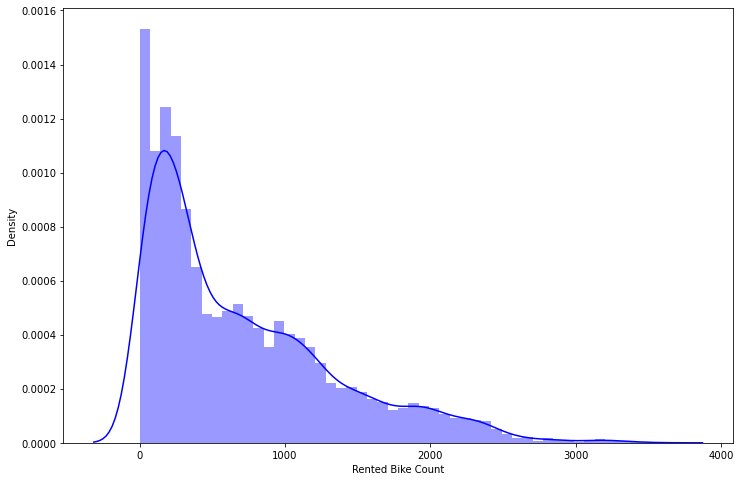

In [84]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,8))
sns.distplot(data['Rented Bike Count'], color = 'b', bins = 50)
plt.show()

We see that our target variable is right skewed.

In [85]:
data['Rented Bike Count'].skew()

1.1534281773679014

We have strong positive skewness of our target variable.

In [86]:
from scipy.stats import normaltest
normaltest(data['Rented Bike Count'].values)

NormaltestResult(statistic=1415.73323838599, pvalue=3.779491395679156e-308)

Normal test shows us that we are far from normal distribution as well

Since we have some entries equal to 0 we cannot perform boxcox and log transforming of our target variable. We may perform only sqrt transforming. Lets check how it works:

In [87]:
sqrt_target = np.sqrt(data['Rented Bike Count'])

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


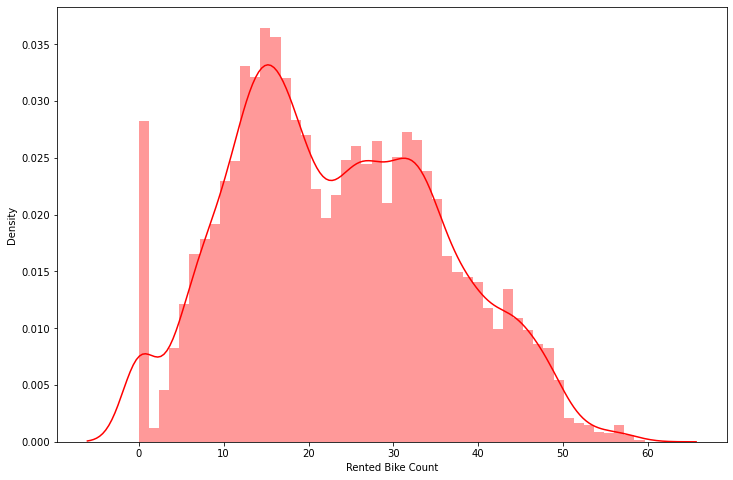

In [88]:
plt.figure(figsize = (12,8))
sns.distplot(sqrt_target, color = 'r', bins = 50)
plt.show()

Now our variable is more normally distributed.

In [89]:
sqrt_target.skew()

0.237362090985412

And we see that our skewness is less.

In [90]:
normaltest(sqrt_target)

NormaltestResult(statistic=455.6349868822935, pvalue=1.148470164788618e-99)

But normaltest shows that we still don't have normal distribution of target variable. But our results are much better now. p_value is much more higher.

### 3. Modelling
a. Simple linear model checking influence of target variable distribution   
b. Lasso model which we need find the strongest features   
c. Ridge model with GridSearch CV and getting the best hyperparameters and parameters for prediction 

Firstly we are importing our libraries

In [91]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [92]:
data.head(10)

,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,1,0,0,0,1
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,1,0,0,0,1
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,1,0,0,0,1
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,1,0,0,0,1
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,1,0,0,0,1
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,1,0,0,0,1


In [93]:
data.shape

(8760, 16)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(øC)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(øC)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Seasons_Autumn             8760 non-null   uint8  
 13  Seasons_Spring             8760 non-null   uint8

#### a. Simple linear model to estimate influence of target variable distribution 

In [95]:
y_col = 'Rented Bike Count'
#features = data[x for x in data.columns if x != y_col]
X = data.drop('Rented Bike Count', axis = 1)
y = data[y_col]
X.head()

,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


In [96]:
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (8760, 15)
Y shape: (8760,)


The first model will be with naturally distributed y variable(without sqrt transormation)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10000)
s = StandardScaler()
X_train_ss = s.fit_transform(X_train).astype('float')
lr = LinearRegression()
lr.fit(X_train_ss, y_train)
X_test_ss = s.transform(X_test)
y_hat = lr.predict(X_test_ss)
score_lr = r2_score(y_test, y_hat)
MSE_lr = mean_squared_error(y_test, y_hat)
print('r2 score for simple linear regression:', score_lr)
print('MSE for simple linear regression:', MSE_lr)

r2 score for simple linear regression: 0.5510238892755448
MSE for simple linear regression: 194712.95974130285


We have r2_score which equals to 0.55 which is not so high value.
Lets check how linear regression performs with more normally distributed target.

In [98]:
X_train_ss = s.fit_transform(X_train).astype('float')
y_train_dist = np.sqrt(y_train)
lr = LinearRegression()
lr.fit(X_train_ss, y_train_dist)
X_test_ss = s.transform(X_test)
y_hat_dist = lr.predict(X_test_ss)
y_hat = y_hat_dist**2
score_lr_dist = r2_score(y_test, y_hat)
MSE_lr_dist = mean_squared_error(y_test, y_hat)
print('r2 score for simple linear regression with normally distributed target:', score_lr_dist)
print('MSE for simple linear regression with normally distributed target:', MSE_lr_dist)

r2 score for simple linear regression with normally distributed target: 0.5759522323478874
MSE for simple linear regression with normally distributed target: 183901.9803926904


We have little bit higher r2_score and lower MSE in the second model which proves a statement that normally distributed target variable is essential for linear regression modelling

r2 score for training data:

In [99]:
r2_score(y_train_dist, lr.predict(X_train_ss))

0.6514963160688118

Looking at r2_score it seems that our model is underfitted.

Lets check the same but with MinMax Scaler:

In [100]:
minmax = MinMaxScaler()
X_train_mm = minmax.fit_transform(X_train).astype('float')
y_train_dist = np.sqrt(y_train)
lr_m = LinearRegression()
lr_m.fit(X_train_mm, y_train_dist)
X_test_mm = minmax.transform(X_test)
y_hat_dist = lr_m.predict(X_test_mm)
y_hat = y_hat_dist**2
score_lr_mm = r2_score(y_test, y_hat)
MSE_lr_mm = mean_squared_error(y_test, y_hat)
print('r2 score for simple linear regression with normally distributed target and MM scaler:', score_lr_mm)
print('MSE for simple linear regression with normally distributed target and MM scaler:', MSE_lr_mm)

r2 score for simple linear regression with normally distributed target and MM scaler: 0.5754339058298745
MSE for simple linear regression with normally distributed target and MM scaler: 184126.76939153453


Results are very similar to the second modelling with more normal distributed target variable.

#### b. Lasso regression to find the most essential parameters 

Firstly lets check what coefficients we have received from linear regression

In [101]:
lr.coef_

array([ 3.35543361e+00,  7.75375660e-01, -5.63242144e+00,  1.33404498e-01,
        1.38469497e-01,  5.96034927e+00, -6.92895967e-01, -1.63800064e+00,
        1.69949361e-01, -5.74065701e-01,  5.06083433e+00, -1.34918996e+14,
       -1.33497439e+14, -1.34519012e+14, -1.33259547e+14])

In [102]:
coef_vals = pd.DataFrame(zip(X.columns.values, lr.coef_))
coef_vals.sort_values(by = 1)

,0,1
11,Seasons_Autumn,-1.349190e+14
13,Seasons_Summer,-1.345190e+14
12,Seasons_Spring,-1.334974e+14
14,Seasons_Winter,-1.332595e+14
2,Humidity(%),-5.632421e+00
7,Rainfall(mm),-1.638001e+00
6,Solar Radiation (MJ/m2),-6.928960e-01
9,Holiday,-5.740657e-01
3,Wind speed (m/s),1.334045e-01
4,Visibility (10m),1.384695e-01


We see that we have very large negative coeficients for seasons dummy variables. Lets try Lasso regression to improve results our model.

In [103]:
kf = KFold(shuffle = True, random_state = 10000, n_splits = 4)
alphas = np.geomspace(0.01, 10, 4)
scores = []
predictions = {}
for alpha in alphas:
    estimator = Pipeline([('degree', PolynomialFeatures(degree = 2)), 
                          ('scaler', MinMaxScaler()), ('Regression', Lasso(alpha = alpha, max_iter = 100000))])
    prediction = cross_val_predict(estimator, X, y, cv = kf)
    predictions[alpha] = prediction
    r2_sc = r2_score(y, prediction)
    scores.append(r2_sc)
    print('for alpha = ', alpha, ' r2score:', r2_sc)

for alpha =  0.01  r2score: 0.700222422709035
for alpha =  0.1  r2score: 0.6978904530305874
for alpha =  1.0  r2score: 0.6690806261618532
for alpha =  10.0  r2score: 0.5686289830215827


We see that we have increased r2_score with regularization, now we can estimate our parameters

We have maximal r2 score for model with alpha = 0.01   
Lets find which parameters have the largest impact on predictions:   
We set alpha = 1 to regect high polynomial coefficients to understand our model better.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10000)
best_estimator = Pipeline([('degree', PolynomialFeatures(degree = 2)), 
                      ('scaler', MinMaxScaler()), ('Regression', Lasso(alpha = 1, max_iter = 100000))])
best_estimator.fit(X_train, y_train)
y_hat = best_estimator.predict(X_test)
score = r2_score(y_test, y_hat)
coefs = best_estimator.named_steps["Regression"].coef_
print('Coefficients for our lasso regression:', coefs)

Coefficients for our lasso regression: [   0.           -0.            0.            0.            0.
   -0.            0.           -0.           -0.           -0.
   -0.          245.04694172    0.           -0.          395.23720111
   -0.           -0.         1528.06637047 -875.81066378    0.
   36.87864597    0.            0.           -0.           -0.
   -0.          862.94813306    0.          -59.78292227   42.47003292
 -166.31677955   -0.           -0.            0.            0.
    0.         -544.39873634   -0.           -0.           -0.
    0.          589.48938102  945.67670117   -0.         -401.00544521
 -341.36007485    0.           21.66434463   -0.          322.70359169
   -0.            0.            0.            0.           -0.
   -0.            0.          121.39141518   -0.            0.
    0.           -0.           -0.           -0.            0.
   18.08594689   -0.           -0.          144.70175402   -0.
  -96.04605101    0.           -0.           -0

In [105]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["degree"].get_feature_names(),
                 best_estimator.named_steps["Regression"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
col_names_dict

C:\Users\PNarnov\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{0: 'Hour',
 1: 'Temperature(øC)',
 2: 'Humidity(%)',
 3: 'Wind speed (m/s)',
 4: 'Visibility (10m)',
 5: 'Dew point temperature(øC)',
 6: 'Solar Radiation (MJ/m2)',
 7: 'Rainfall(mm)',
 8: 'Snowfall (cm)',
 9: 'Holiday',
 10: 'Functioning Day',
 11: 'Seasons_Autumn',
 12: 'Seasons_Spring',
 13: 'Seasons_Summer',
 14: 'Seasons_Winter'}

In [106]:
df_importances.sort_values(by=1)

,0,1
18,x0 x2,-875.810664
103,x7 x10,-768.909953
81,x5^2,-621.497961
36,x1 x6,-544.398736
91,x6^2,-507.265193
...,...,...
14,x13,395.237201
41,x1 x11,589.489381
26,x0 x10,862.948133
42,x1 x12,945.676701


### Lasso results:

We see 5 strogest positive and negative features.   
We see strong positive impact of Spring (x12) and Summer (x13) seasons, as well as working hour(x0) with temperature(x1). Warm temperature in spring and Autumn has good influens on bike renting.
We see strong negative impact of Working hour (x0) with Humidity (x2) and Rainfall (x7) with Func day(x10).

We can start performing Ridge regression via GridSearch CV to get best prediction parameters for our model. 

#### c. Ridge regression via GridSearch CV 

In [107]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge(max_iter = 10000))])

params = {
    'polynomial_features__degree': [1, 2, 3, 4],
    'ridge_regression__alpha': np.geomspace(0.01, 10, 8)
}
    
grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X,np.sqrt(y))

print('Best score:', grid.best_score_, 'Best params:', grid.best_params_)

Best score: 0.7481608709543879 Best params: {'polynomial_features__degree': 2, 'ridge_regression__alpha': 0.01}


In [108]:
y_hat = grid.predict(X)
r2_score(y, y_hat**2)

0.7212058180854353

We found our best hyperparameters for this model and got about 72% of prediction accuracy.

### 4. Summary key findings and insights

1. Linear regression modelling proves that normally distributed target variable shows better moddeling results
2. I found features which have the strongest coefficients with Lasso regression (see Lasso results).
3. I built the predictive model with Ridge regression using Grid Search CV. 

### Best regards
# Pavel Narnov